In [ ]:
# default_exp openstreet_map

# Openstreet Map

> Why Openstreet Map?

**In short:** 
* Node: a point with long, lat info
* Way : a orderred list of nodes
* Relation: a combination of nodes, ways, and relations.

In [ ]:
#hide
from nbdev.showdoc import *

### Get xml data a node

In [ ]:
# Get xml data of node with id=1 using overpass API
!curl --globoff -o data/output.xml "http://overpass-api.de/api/interpreter?data=node(1);out;"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   484    0   484    0     0    491      0 --:--:-- --:--:-- --:--:--   490


In [ ]:
# Check output
!cat data/output.xml

<?xml version="1.0" encoding="UTF-8"?>
<osm version="0.6" generator="Overpass API 0.7.56.8 7d656e78">
<note>The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.</note>
<meta osm_base="2021-02-16T00:11:03Z"/>

  <node id="1" lat="42.7957187" lon="13.5690032">
    <tag k="man_made" v="communications_tower"/>
    <tag k="name" v="Monte Piselli-Radio Subasio 105.5 MHz"/>
    <tag k="tower:type" v="communication"/>
  </node>

</osm>


In [ ]:
# Get JSON data of node with id=1 using overpass API
!curl --globoff -o data/output.json "http://overpass-api.de/api/interpreter?data=[out:json];node(1);out;"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   503    0   503    0     0    606      0 --:--:-- --:--:-- --:--:--   605


In [ ]:
# Check output
!cat data/output.json

{
  "version": 0.6,
  "generator": "Overpass API 0.7.56.8 7d656e78",
  "osm3s": {
    "timestamp_osm_base": "2021-02-16T00:11:03Z",
    "copyright": "The data included in this document is from www.openstreetmap.org. The data is made available under ODbL."
  },
  "elements": [

{
  "type": "node",
  "id": 1,
  "lat": 42.7957187,
  "lon": 13.5690032,
  "tags": {
    "man_made": "communications_tower",
    "name": "Monte Piselli-Radio Subasio 105.5 MHz",
    "tower:type": "communication"
  }
}

  ]
}


In [ ]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()


In [ ]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.56.8 7d656e78',
 'osm3s': {'timestamp_osm_base': '2021-02-16T00:11:03Z',
  'timestamp_areas_base': '2021-02-15T23:14:02Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 23662384,
   'lat': 50.5112014,
   'lon': 6.9939896,
   'tags': {'amenity': 'biergarten'}},
  {'type': 'node',
   'id': 25338407,
   'lat': 49.9534891,
   'lon': 10.8750469,
   'tags': {'amenity': 'biergarten', 'noname': 'yes'}},
  {'type': 'node',
   'id': 26865440,
   'lat': 52.4333644,
   'lon': 13.190734,
   'tags': {'amenity': 'biergarten',
    'name': 'Spinnerbrücke',
    'note': 'Motorradtreff',
    'toilets:wheelchair': 'no',
    'website': 'http://www.spinner-bruecke.de/',
    'wheelchair': 'yes'}},
  {'type': 'node',
   'id': 26870913,
   'lat': 50.0110113,
   'lon': 8.3917604,
   'tags': {'addr:city': 'Flörsheim',
    'addr:postcode': '65439',
 

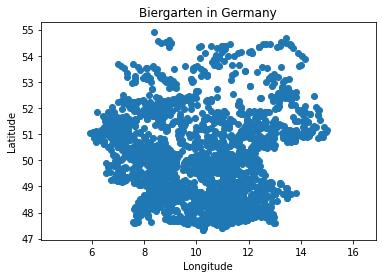

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))# Convert coordinates into numpy array

X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()


In [ ]:
# import overpy

# api = overpy.Overpass()
# r = api.query("""
# area["ISO3166-1"="DE"][admin_level=2];
# (node["amenity"="biergarten"](area);
#  way["amenity"="biergarten"](area);
#  rel["amenity"="biergarten"](area);
# );
# out center;
# """)

# coords  = []
# coords += [(float(node.lon), float(node.lat)) 
#            for node in r.nodes]
# coords += [(float(way.center_lon), float(way.center_lat)) 
#            for way in r.ways]
# coords += [(float(rel.center_lon), float(rel.center_lat)) 
#            for rel in r.relations]
